<a href="https://colab.research.google.com/github/josh-shah/josh-shah.github.io/blob/main/FPL_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# scipy
import scipy as sp

# scikit-learn
import sklearn as sk

# import other important functions and algorithms
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [12]:
#Get 21/22 data
url_2021 = '/content/21_22_cleaned_players_FPL.csv'

In [13]:
df_key_stats_2021 = pd.read_csv(url_2021)
df_key_stats_2021.keys()

Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type',
       'Team'],
      dtype='object')

In [14]:
# Fix the column headers
df_key_stats_2021.columns = ["First_Name","Surname", "Goals","Assists", "Total_Points", "Minutes", "Goals_Conceded","Creativity", "Influence","Threat", "Bonus_Points","BPS", "ICT_Index", "Clean_Sheets", "Red_Cards", "Yellow_Cards", "Selected_By_Percent","Now_cost","Position", "Team"]
df_key_stats_2021

,First_Name,Surname,Goals,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus_Points,BPS,ICT_Index,Clean_Sheets,Red_Cards,Yellow_Cards,Selected_By_Percent,Now_cost,Position,Team
0,Bernd,Leno,0,0,10,360,9,0.0,85.0,0,0,69,8.5,1,0,0,0.8,4.5,GK,Arsenal
1,Rúnar Alex,Rúnarsson,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.5,4.0,GK,Arsenal
2,Willian,Borges Da Silva,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.1,6.3,MID,Arsenal
3,Pierre-Emerick,Aubameyang,4,1,44,1036,16,132.4,217.6,582,7,131,92.9,6,0,3,1.2,9.6,FWD,Arsenal
4,Cédric,Soares,1,1,48,1481,27,306.5,246.0,76,3,292,63.0,3,0,3,0.4,4.2,DEF,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,Bruno André,Cavaco Jordão,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,4.5,MID,Wolves
733,Toti António,Gomes,0,0,6,360,6,4.3,59.6,28,0,52,9.2,0,0,1,0.0,4.4,DEF,Wolves
734,Dion,Sanderson,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,4.0,DEF,Wolves
735,Ryan,Giles,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,4.5,MID,Wolves


In [15]:
# Pick the features we want
df_key_stats_2021 = df_key_stats_2021[["Position","First_Name","Surname", "Team","Goals","Assists", "Total_Points", "Minutes", "Goals_Conceded","Creativity", "Influence","Threat", "Bonus_Points","BPS", "ICT_Index", "Clean_Sheets", "Red_Cards", "Yellow_Cards", "Selected_By_Percent","Now_cost"]]
df_key_stats_2021 = df_key_stats_2021.iloc[1:]
df_key_stats_2021

,Position,First_Name,Surname,Team,Goals,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus_Points,BPS,ICT_Index,Clean_Sheets,Red_Cards,Yellow_Cards,Selected_By_Percent,Now_cost
1,GK,Rúnar Alex,Rúnarsson,Arsenal,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.5,4.0
2,MID,Willian,Borges Da Silva,Arsenal,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.1,6.3
3,FWD,Pierre-Emerick,Aubameyang,Arsenal,4,1,44,1036,16,132.4,217.6,582,7,131,92.9,6,0,3,1.2,9.6
4,DEF,Cédric,Soares,Arsenal,1,1,48,1481,27,306.5,246.0,76,3,292,63.0,3,0,3,0.4,4.2
5,FWD,Alexandre,Lacazette,Arsenal,4,8,90,1773,17,385.7,376.6,724,3,295,148.3,10,0,0,3.1,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,MID,Bruno André,Cavaco Jordão,Wolves,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,4.5
733,DEF,Toti António,Gomes,Wolves,0,0,6,360,6,4.3,59.6,28,0,52,9.2,0,0,1,0.0,4.4
734,DEF,Dion,Sanderson,Wolves,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,4.0
735,MID,Ryan,Giles,Wolves,0,0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,4.5


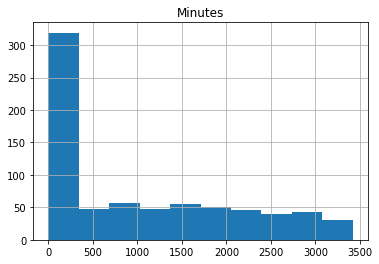

In [16]:
# Notice how many players barely play or don't play at all
df_key_stats_2021[["Minutes"]].hist()
plt.show()


In [17]:
# weed out players who do not play even 600 minutes
df_key_stats_2021.sort_values('Minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2021
count = 0
for index, row in df_key_stats_2021.iterrows():
    if(row["Minutes"] < 600):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2021 = df_key_stats_2021[358:]

358


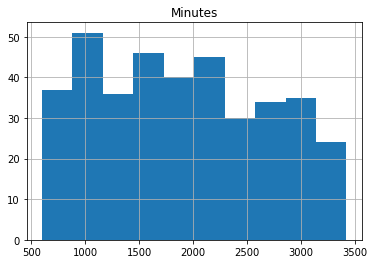

In [18]:
# better data to work with
df_key_stats_2021[["Minutes"]].hist()
plt.show()

In [19]:
df_key_stats_2021

,Position,First_Name,Surname,Team,Goals,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus_Points,BPS,ICT_Index,Clean_Sheets,Red_Cards,Yellow_Cards,Selected_By_Percent,Now_cost
524,DEF,Jacob,Sørensen,Norwich,0,0,9,600,18,12.2,104.6,86,0,92,20.4,0,0,0,0.0,4.3
268,MID,André Filipe,Tavares Gomes,Everton,0,1,18,614,19,85.2,84.0,136,0,47,30.6,0,0,3,0.1,4.9
526,FWD,Adam,Idah,Norwich,1,2,36,617,11,84.0,120.2,187,3,107,38.5,1,0,0,0.5,4.8
322,DEF,Wesley,Fofana,Leicester,0,0,17,630,7,29.8,109.6,23,2,112,16.3,1,0,2,0.9,4.3
678,DEF,Arthur,Masuaku,West Ham,1,1,29,645,12,57.2,178.2,39,3,145,27.5,1,0,1,0.1,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,DEF,Conor,Coady,Wolves,4,0,138,3361,43,45.4,737.2,202,10,688,98.8,11,0,4,13.4,4.7
60,DEF,Matthew,Cash,Aston Villa,4,3,147,3377,50,432.1,709.0,517,11,623,165.8,13,0,8,11.5,5.3
351,GK,Illan,Meslier,Leeds,0,0,106,3384,79,0.0,1059.6,0,8,713,105.8,5,0,2,2.0,4.8
441,GK,David,de Gea,Manchester United,0,0,132,3420,57,0.3,947.2,0,7,667,94.2,8,0,0,8.5,5.0


In [22]:
#save as csv
df_key_stats_2021.to_csv('FPL_21_22_project.csv')